In [18]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from challenge_utils import build_training_data, relative_squared_error, load_onnx
import time 
import matplotlib.pyplot as plt

In [19]:


student_data_path = 'students_drahi_production_consumption_hourly.csv'

target_time, targets, predictors = build_training_data(student_data_path)

ntot = len(targets)
x_all = predictors.reshape(ntot, -1)
y_all = targets

y_pred_gb_onnx = load_onnx('gradient_boosting_model.onnx', x_all)
y_pred_rf_onnx = load_onnx('random_forest_model.onnx', x_all)

RelativeMSE_rf_onnx = relative_squared_error(y_pred_rf_onnx, y_all)
RelativeMSE_gb_onnx = relative_squared_error(y_pred_gb_onnx, y_all)
print('Gradient boosting loss :', RelativeMSE_gb_onnx)
print('Random forest loss :', RelativeMSE_rf_onnx)

Loaded hourly data
Calculated daily energy consumption
Calculated predictor window
Gradient boosting loss : 0.0003804980971900031
Random forest loss : 0.023980645376684706


In [20]:

date_for_plot = [0]* len(target_time)
for i in range(len(target_time)):
    date_str = np.datetime_as_string(target_time[i], unit='D', casting='same_kind').split('T')[0]
    date_for_plot[i] = '/'.join(date_str.split('-')[::-1])
print(date_for_plot)
print(y_pred_rf_onnx.shape)
print(y_all.shape)

['08/01/2022', '09/01/2022', '10/01/2022', '11/01/2022', '12/01/2022', '13/01/2022', '14/01/2022', '15/01/2022', '24/01/2022', '25/01/2022', '26/01/2022', '27/01/2022', '28/01/2022', '29/01/2022', '30/01/2022', '31/01/2022', '01/02/2022', '02/02/2022', '03/02/2022', '04/02/2022', '05/02/2022', '06/02/2022', '07/02/2022', '08/02/2022', '09/02/2022', '10/02/2022', '19/02/2022', '20/02/2022', '21/02/2022', '22/02/2022', '23/02/2022', '24/02/2022', '25/02/2022', '26/02/2022', '27/02/2022', '28/02/2022', '01/03/2022', '02/03/2022', '03/03/2022', '04/03/2022', '05/03/2022', '06/03/2022', '07/03/2022', '08/03/2022', '09/03/2022', '10/03/2022', '11/03/2022', '12/03/2022', '13/03/2022', '14/03/2022', '15/03/2022', '16/03/2022', '17/03/2022', '18/03/2022', '19/03/2022', '20/03/2022', '29/03/2022', '30/03/2022', '31/03/2022', '01/04/2022', '02/04/2022', '03/04/2022', '04/04/2022', '05/04/2022', '06/04/2022', '25/04/2022', '26/04/2022', '27/04/2022', '28/04/2022', '29/04/2022', '30/04/2022', '01/0

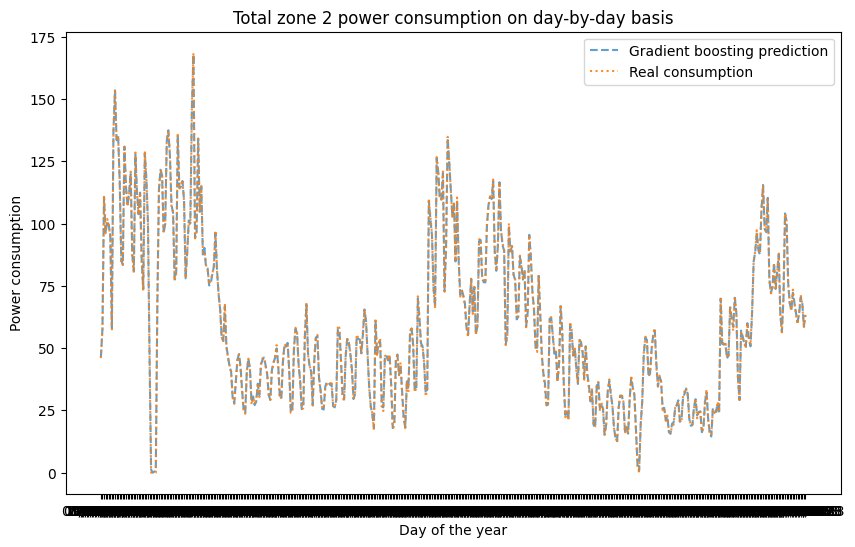

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(date_for_plot, y_pred_gb_onnx, '--', label='Gradient boosting prediction', alpha=0.7)
#plt.plot(date_for_plot, y_pred_rf_onnx, '-.', label='Random forest prediction', alpha=0.5)
plt.plot(date_for_plot, y_all, ':', label='Real consumption', alpha=0.5)
plt.title('Total zone 2 power consumption on day-by-day basis')
plt.xlabel('Day of the year')
plt.ylabel('Power consumption')
plt.legend()
plt.show()


In [69]:
start_index_2023 = np.where(target_time.astype('datetime64[Y]') == np.datetime64('2023'))[0][0]

print("L'indice où commence l'année 2023 :", start_index_2023)
print(target_time[start_index_2023])
target_time_2023 = target_time[start_index_2023:]
y_all_2023 = y_all[start_index_2023:]

y_pred_gb_2023 = y_pred_gb_onnx[start_index_2023:]
y_pred_rf_2023 = y_pred_rf_onnx[start_index_2023:]


L'indice où commence l'année 2023 : 238
2023-01-06T00:00:00


[0, 48, 87, 156]
end : 156
24
j'annote
Winter
end : 208
67
j'annote
Spring
end : 208
121
j'annote
Summer
end : 208
len filtered dates : 208 208
182
j'annote
Autumn


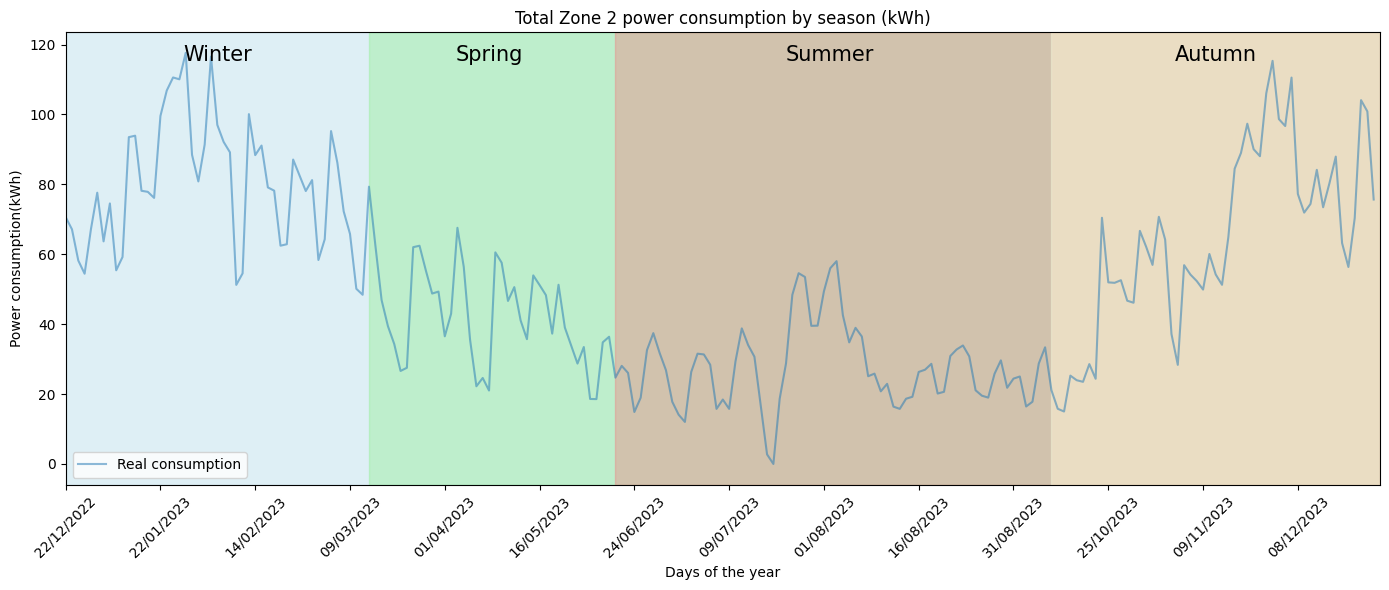

In [144]:
def first_occurrences(lst):
    first_indices = [0]  # Le premier indice est toujours inclus
    for i in range(1, len(lst)):
        if lst[i] != lst[i - 1]:
            first_indices.append(i)
    return first_indices

def get_seasons(dates):
    # Début de l'hiver 2022 et fin de l'automne 2023
    start_date = np.datetime64('2022-12-01')
    end_date = np.datetime64('2023-12-31')

    spring_equinox = np.datetime64('2023-03-20')
    summer_solstice = np.datetime64('2023-06-21')
    autumn_equinox = np.datetime64('2023-09-22')
    winter_solstice = np.datetime64('2023-12-21')

    seasons = []
    for date in dates:
        if start_date <= date <= end_date:
            if date < spring_equinox or date >= winter_solstice:
                seasons.append('Winter')
            elif spring_equinox <= date < summer_solstice:
                seasons.append('Spring')
            elif summer_solstice <= date < autumn_equinox:
                seasons.append('Summer')
            elif autumn_equinox <= date < winter_solstice:
                seasons.append('Autumn')
    return np.array(seasons)

# Filtrer les dates entre le début de l'hiver 2022 et la fin de l'automne 2023
filter = (target_time >= np.datetime64('2022-12-22')) & (target_time < np.datetime64('2023-12-21'))
filtered_dates = target_time[filter]

filtered_y_all = y_all[filter]
#have the dates for plots
date_for_plot_filter = [0]* len(filtered_dates)
for i in range(len(filtered_dates)):
    date_str = np.datetime_as_string(filtered_dates[i], unit='D', casting='same_kind').split('T')[0]
    date_for_plot_filter[i] = '/'.join(date_str.split('-')[::-1])

# Calcul des saisons pour chaque date filtrée
seasons = get_seasons(filtered_dates)

# Trouver les indices où les saisons changent
season_change_indices = first_occurrences(seasons)

# Créer une liste des saisons avec une seule entrée pour chaque saison
season_labels = seasons[season_change_indices]
# Créer une liste des positions correspondant à chaque changement de saison dans les données
season_positions = season_change_indices

season_start_indices = [season_positions[i] for i in range(0, len(season_positions))]

# Tracer le graphique
plt.figure(figsize=(14, 6))  # Ajustez la taille de la figure selon le nombre d'années
plt.plot(range(len(filtered_y_all)), filtered_y_all, label='Real consumption', alpha=0.5)

# Colorier chaque période de saison avec une couleur différente, et mettre une légende
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
print(season_start_indices)
for i in range(len(season_start_indices)):
    start = season_start_indices[i]
    end = season_positions[i+len(season_labels)-1] if i+len(season_labels) <= len(season_positions) else len(filtered_y_all)
    print('end :', end)
    plt.axvspan(start, end, color=colors[i%len(colors)], alpha=0.4)

    if i==len(season_start_indices) - 1:
        print('len filtered dates :',len(filtered_dates), len(filtered_y_all))
        pos =(start+ len(filtered_y_all))//2      
    else:
        pos =(start+ season_start_indices[i+1])//2
    print(pos)
    print("j'annote")
    print(season_labels[i])
    plt.annotate(season_labels[i], xy=(pos, 0), xytext=(0, +290),
                textcoords='offset points', ha='center', fontsize=15, color='black')

plt.title('Total Zone 2 power consumption by season (kWh)')
plt.xlabel('Days of the year')
plt.ylabel('Power consumption(kWh)')

plt.xlim(0, len(filtered_y_all))
day_limit = 15
plt.xticks(ticks =range(len(filtered_y_all))[::day_limit] , labels=date_for_plot_filter[::day_limit], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
